# Perceptron From Scratch

- Linear Classifier.
- Discriminative model.

### Perceptron:
$$  \mathbf{w}^{\tau+1} = \mathbf{w}^{\tau} + \eta \phi(\mathbf{x}_n) t_n  $$
The data need to be transformed to be linearly separable before we apply the classification, 
<br>
in this case the data is already linearly separable:
$$  \phi(\mathbf{x}_n) = \mathbf{x}_n  $$
To get the missclasified values:
$$  t_n = t_{n_{actual}} - t_{n_{predicted}}  $$
Therefore:
$$  \therefore \mathbf{w}^{\tau+1} = \mathbf{w}^{\tau} + \eta \mathbf{x}_n (t_{n_{actual}} - t_{n_{predicted}})  $$

### For more info please check:
- <a href="https://en.wikipedia.org/wiki/Perceptron">Perceptron</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Perceptron:

    def __activation_func(self, g):
        return 1 if g >= 0 else 0
    
    def __predict(self, x):
        g = (self.W.T).dot(x)
        a = self.__activation_func(g)
        return a
    
    def __plot(self, X, t):
        color_cond=['blue' if i==1 else 'green' for i in t]
        plt.scatter(np.array(X[:,1]), np.array(X[:,2]), color=color_cond)        

        slope = -(self.W[1] / self.W[2])
        intercept = -(self.W[0] / self.W[2])

        ax = plt.gca()
        ax.autoscale(False)
        x_vals = np.array(ax.get_xlim())
        y_vals = intercept + (slope * x_vals)
        plt.plot(x_vals, y_vals);

        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title('Data(X1, X2)')
        plt.show()
        
    def predict(self, X):
        if (hasattr(self, 'W')):
            X = np.hstack((np.ones((len(X), 1)), X))
            g = X@self.W
            a = np.array([1 if i >= 0 else 0 for i in g])
            return a
        else:
            print('Please run fit in order to be able to use predict')
            
    def scatter_plot(self, X, t):
        if (hasattr(self, 'W')):
            X = np.hstack((np.ones((len(X), 1)), X))
            self.__plot(X, t)
        else:
            print('Please run fit in order to be able to use scatter_plot')
            
    def accuracy(self, y_actual, y_predicted):
        return np.mean(y_actual == y_predicted) * 100
    
    def fit(self, X, t, learning_rate = 1, epochs = 100):
        self.X = np.hstack((np.ones((len(X), 1)), X))
        self.W = np.zeros(len(self.X[0]))
        self.t = t
        self.learning_rate = learning_rate
        self.epochs = epochs

        self.epoch = 0
        while self.epoch < self.epochs:
            self.epoch = self.epoch + 1
            self.old_W = np.copy(self.W)
            for index, x in enumerate(self.X):
#                 see the equation above
                self.W = self.W + self.learning_rate * (self.t[index] - self.__predict(x)) * x
            if np.array_equal(self.W, self.old_W):
                break
            print(self.W)
            self.__plot(self.X, self.t)

# Dataset 1

### Training

In [3]:
Data1 = np.genfromtxt('Data1.txt')
# Data = Data[Data[:,0] < 40] # Without outliers
X1 = Data1[:, 0:2]
t1 = [1 if i >= 0 else 0 for i in Data1[:, 2]]

[0.        0.0274082 0.065793 ]


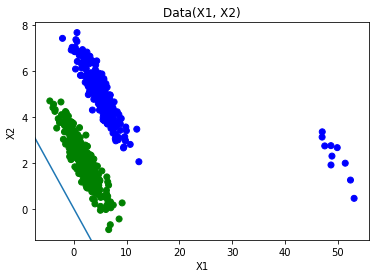

[-0.03       0.0220582  0.012206 ]


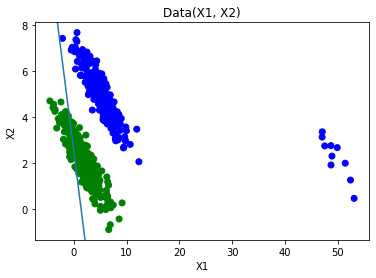

[-0.03       0.0239862  0.05062  ]


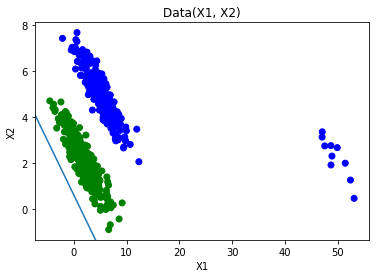

[-0.05       0.0202412  0.022431 ]


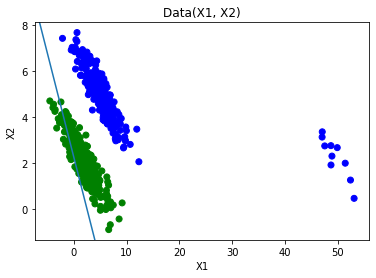

[-0.07       0.0182852  0.0163401]


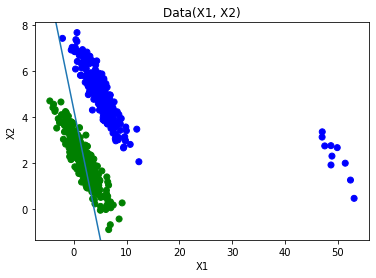

[-0.07       0.0202132  0.0547541]


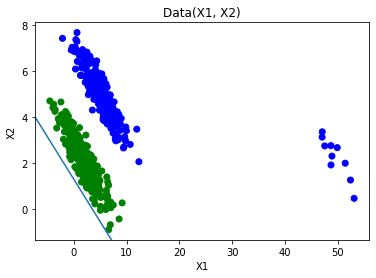

[-0.08       0.0364712  0.0514411]


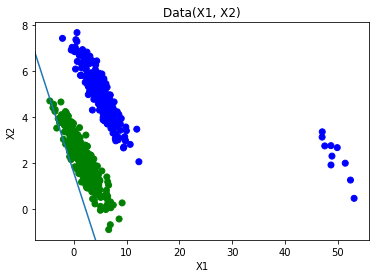

[-0.1         0.0487822   0.06887802]


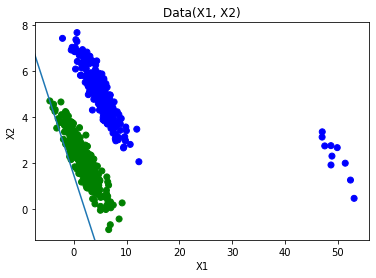

[-0.12        0.0253072   0.05257002]


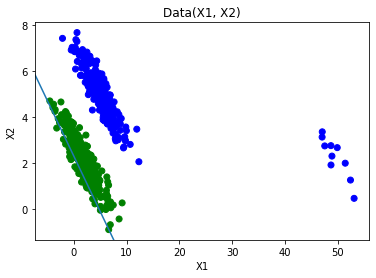

[-0.13        0.0415652   0.04925702]


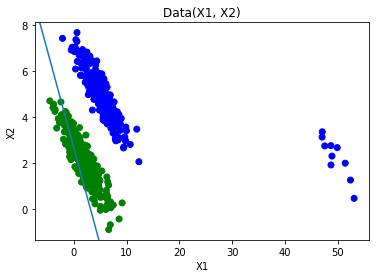

[-0.14        0.0089692   0.03428002]


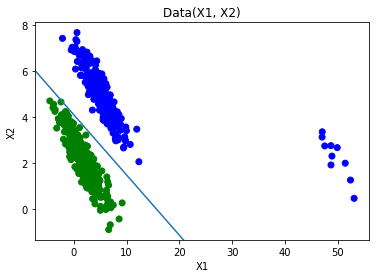

In [4]:
perceptron1 = Perceptron()
perceptron1.fit(X1, t1, 0.01, 20)

### Testing

Accuracy 100.0 %


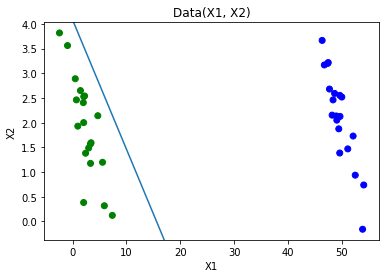

In [9]:
Data1_test = np.genfromtxt('Test1.txt')
X1_test = Data1_test[:, 0:2]
y1_actual = np.array([1 if i >= 0 else 0 for i in Data1_test[:, 2]])
y1_predicted = perceptron1.predict(X1_test)
acc1 = perceptron1.accuracy(y1_actual, y1_predicted)
print('Accuracy', acc1, '%')
perceptron1.scatter_plot(X1_test, y1_actual)

# Dataset 2

### Training

In [6]:
Data2 = np.genfromtxt('synth.tr.csv', delimiter=',', skip_header=True)
X2 = Data2[:, 1:3]
t2 = Data2[:, 3]

[ 0.01       -0.00010428  0.01247274]


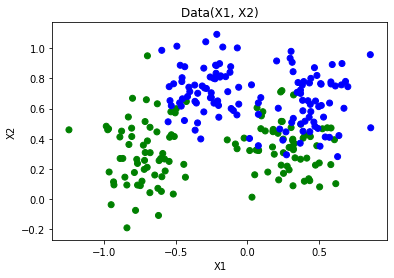

[0.         0.00088404 0.01984386]


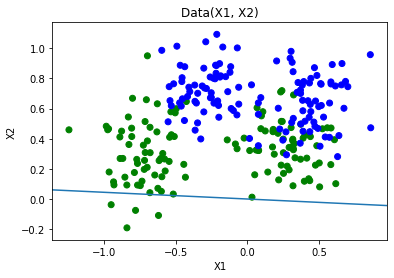

[0.         0.00707292 0.02599639]


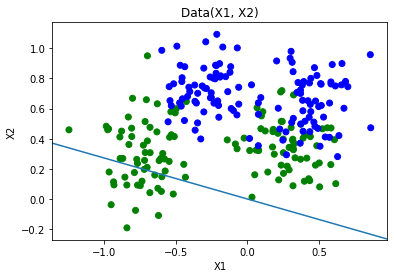

[0.         0.00315173 0.0321069 ]


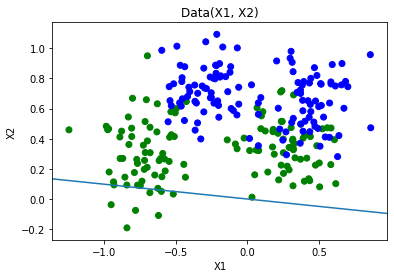

[3.46944695e-18 4.19566690e-03 3.49221972e-02]


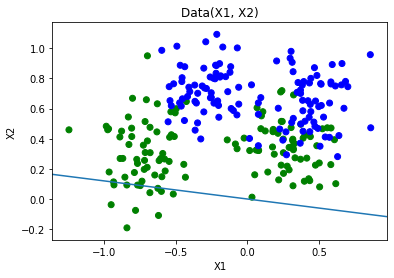

[3.46944695e-18 5.23960670e-03 3.77374928e-02]


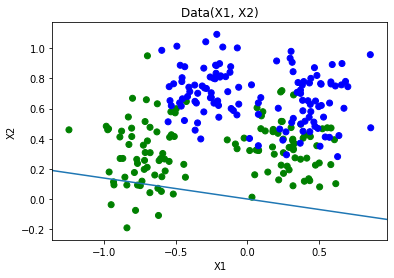

[3.46944695e-18 2.81188000e-03 4.17614115e-02]


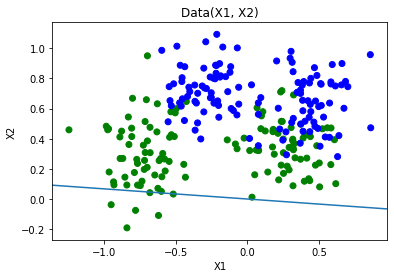

[-0.01        0.00360039  0.04355922]


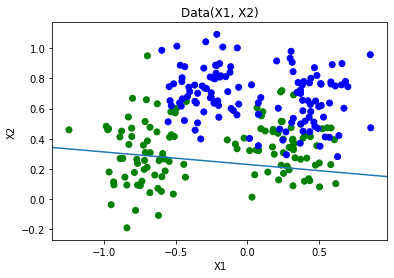

[-0.01        0.00657251  0.04635474]


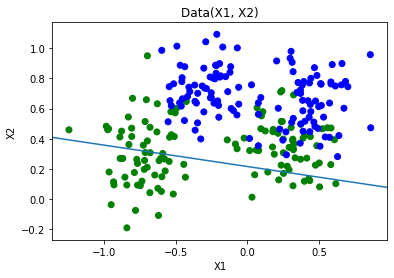

[-0.01        0.00945456  0.04775365]


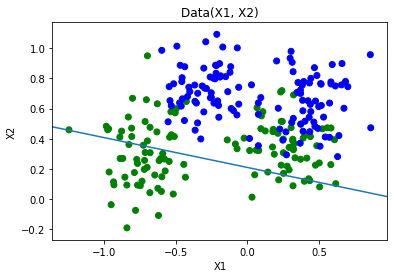

[-0.01        0.0123366   0.04915257]


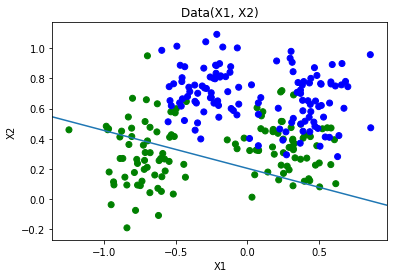

[-0.01        0.00997802  0.04985294]


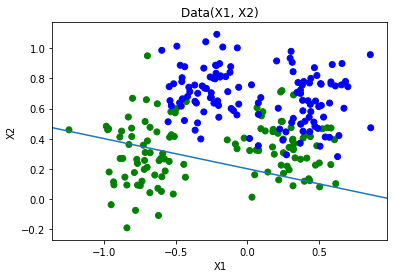

[-0.01        0.00761945  0.05055331]


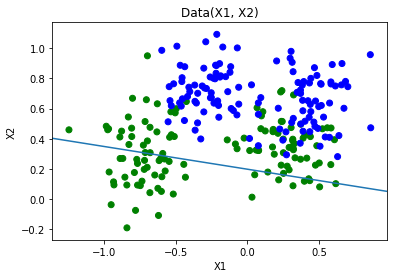

[-0.01        0.00535095  0.05265029]


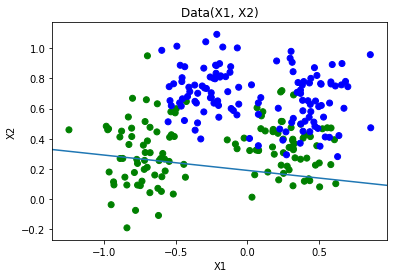

[-0.01        0.00308245  0.05474727]


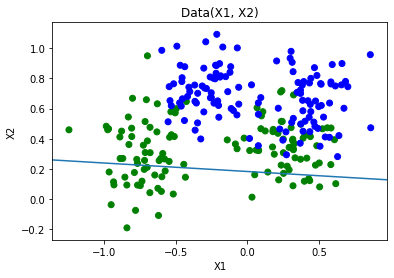

[-0.01        0.00889414  0.05774809]


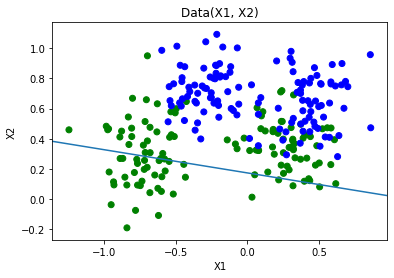

[-0.01        0.01326965  0.0570604 ]


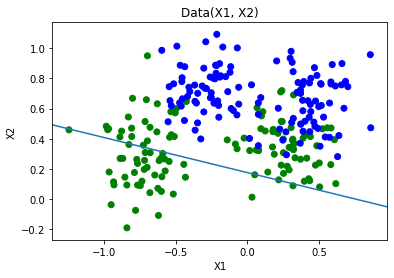

[-0.01        0.00612352  0.05978552]


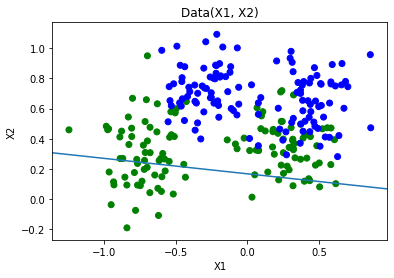

[-0.01        0.01097315  0.06179264]


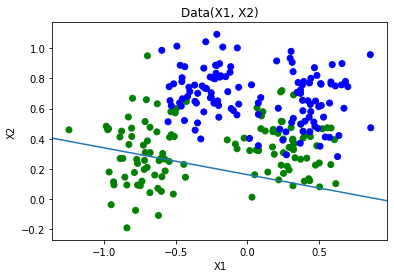

[-0.01        0.01404917  0.06190952]


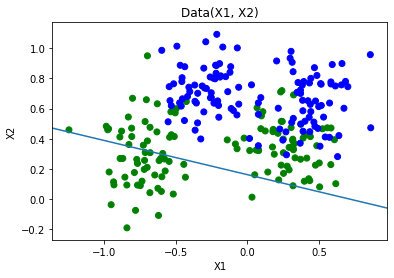

[-0.02        0.00793194  0.06200504]


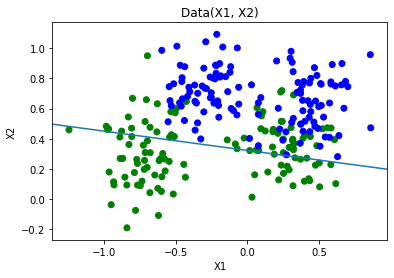

[-0.01        0.0125203   0.06409529]


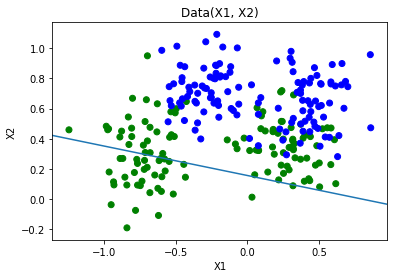

[-0.02        0.00974173  0.06458365]


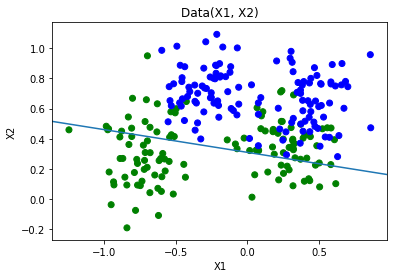

[-0.02        0.00747323  0.06668063]


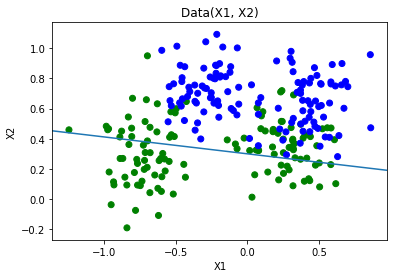

[-0.02        0.00520473  0.06877761]


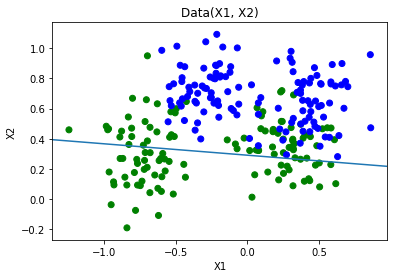

[-0.02        0.00293623  0.07087459]


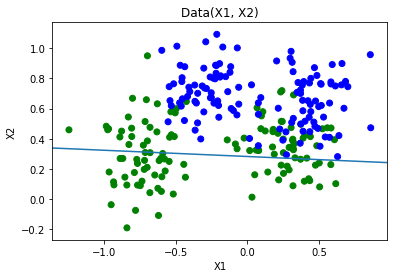

[-0.02        0.0112746   0.06652693]


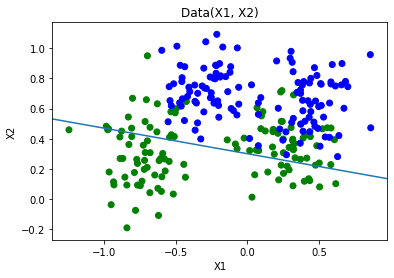

[-0.02        0.0090061   0.06862391]


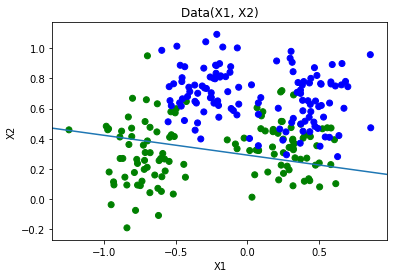

[-0.02        0.00673761  0.07072089]


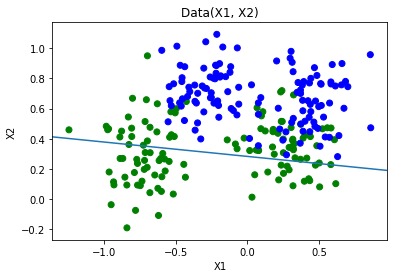

[-0.02        0.00446911  0.07281786]


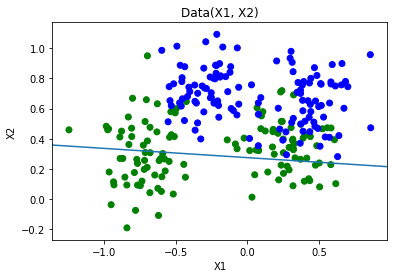

[-0.02        0.01280748  0.06847021]


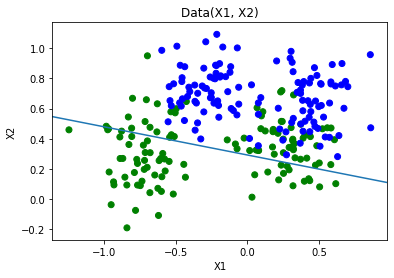

[-0.02        0.0104489   0.06917058]


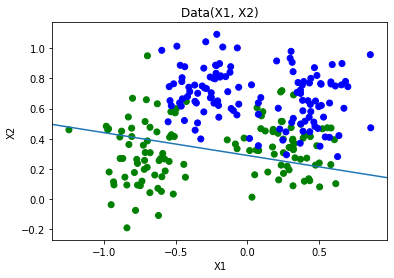

[-0.02        0.00818041  0.07126756]


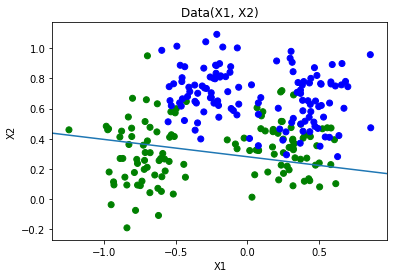

[-0.02        0.00591191  0.07336454]


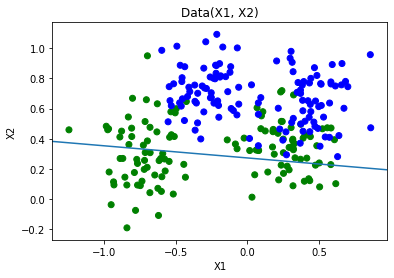

[-0.02        0.01425028  0.06901688]


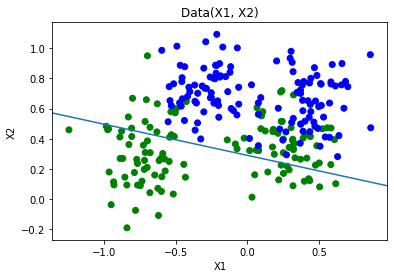

[-0.02        0.0118917   0.06971725]


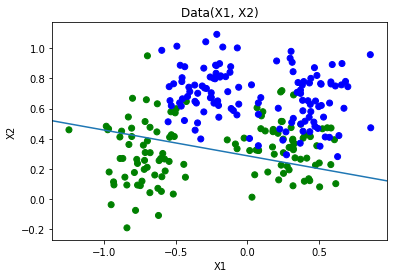

[-0.02        0.00953313  0.07041763]


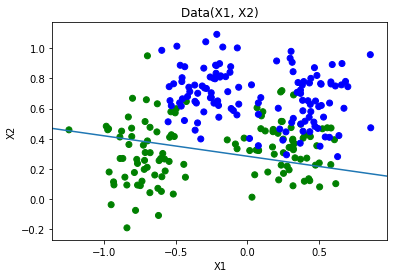

[-0.02        0.00726463  0.0725146 ]


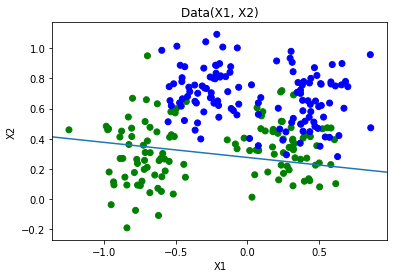

[-0.02        0.00499613  0.07461158]


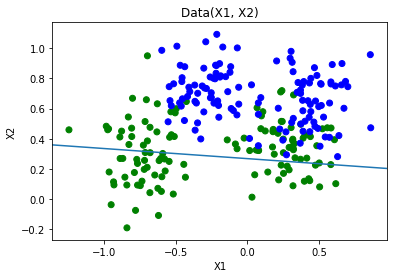

[-0.02        0.01433677  0.07062868]


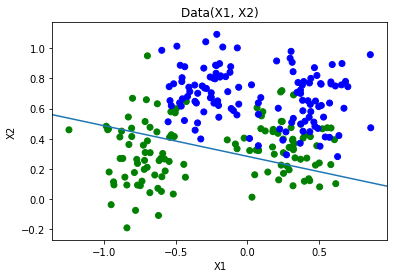

[-0.02        0.01197819  0.07132905]


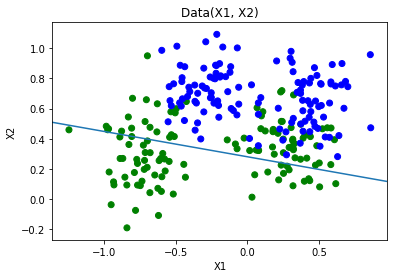

[-0.02        0.00961961  0.07202943]


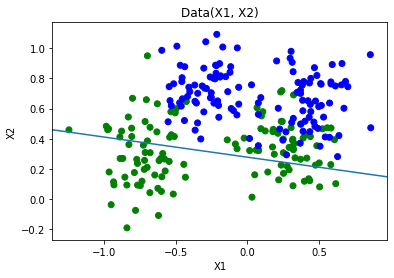

[-0.02        0.00726104  0.0727298 ]


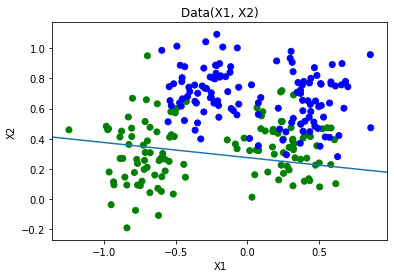

[-0.02        0.00499254  0.07482678]


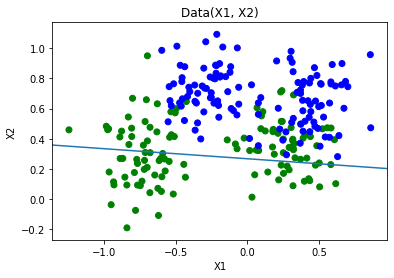

[-0.02        0.01433318  0.07084388]


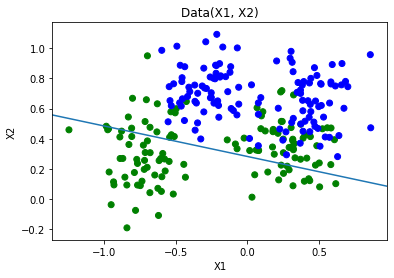

[-0.02        0.0119746   0.07154425]


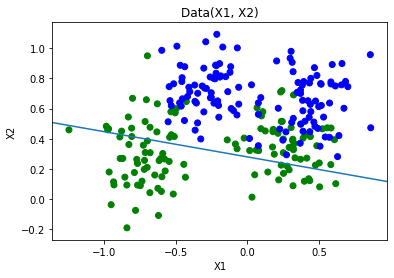

[-0.02        0.00961602  0.07224462]


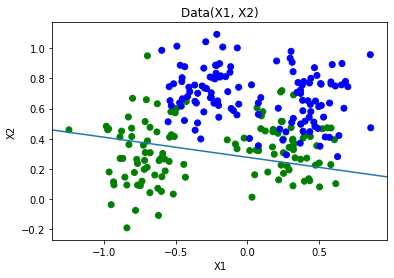

[-0.02        0.00725745  0.07294499]


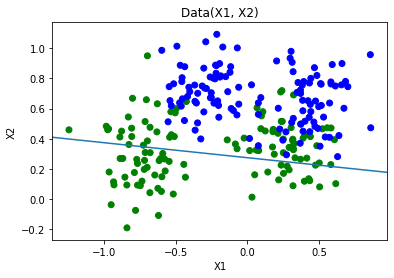

[-0.02        0.01559582  0.06859734]


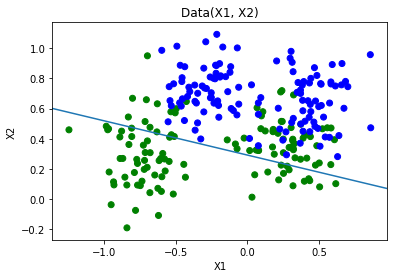

[-0.02        0.01323725  0.06929771]


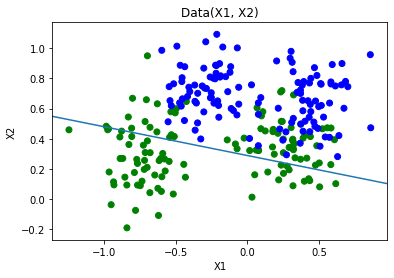

In [12]:
perceptron2 = Perceptron()
perceptron2.fit(X2, t2, 0.01, 50)

### Testing

Accuracy 77.60000000000001 %


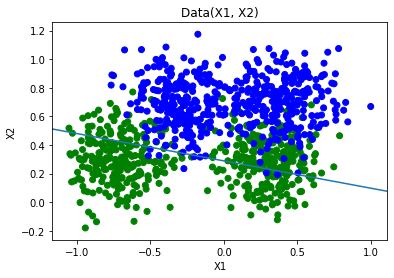

In [13]:
Data2_test = np.genfromtxt('synth.te.csv', delimiter=',', skip_header=True)
X2_test = Data2_test[:, 1:3]
y2_actual = Data2_test[:, 3]
y2_predicted = perceptron2.predict(X2_test)
acc2 = perceptron2.accuracy(y2_actual, y2_predicted)
print('Accuracy', acc2, '%')
perceptron2.scatter_plot(X2_test, y2_actual)

# Dataset 3

### Training

In [15]:
from sklearn.datasets import make_classification


In [16]:
X3, t3 = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14, class_sep=1)

[ 0.          0.03862676 -0.00503666]


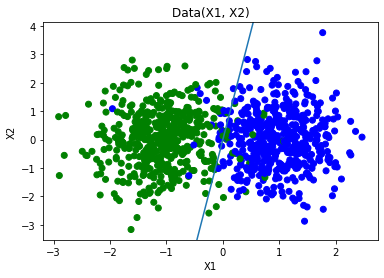

[-0.01        0.03742716 -0.01241684]


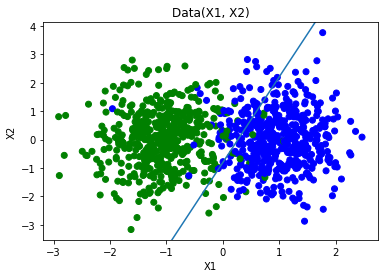

[-0.01        0.04059191 -0.01093745]


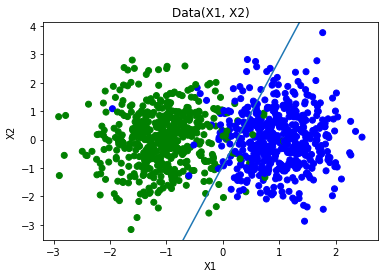

[-0.01        0.05356459  0.00477406]


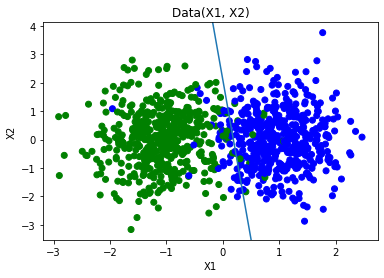

[-0.01        0.04024474 -0.01117572]


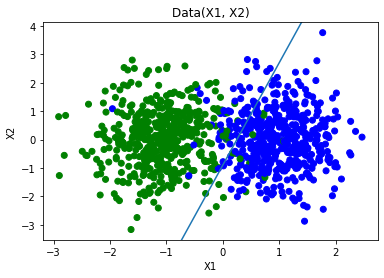

[-0.01        0.04446531 -0.01092732]


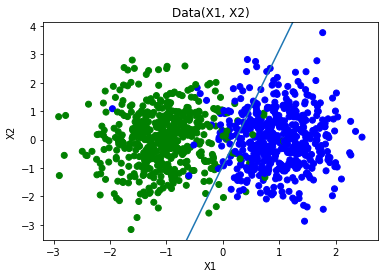

[ 0.          0.04258215 -0.01093015]


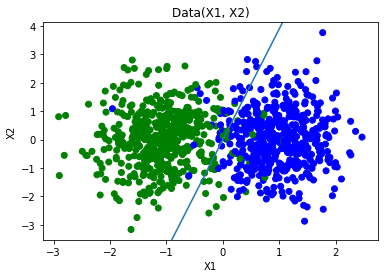

[ 0.          0.04533228 -0.00336172]


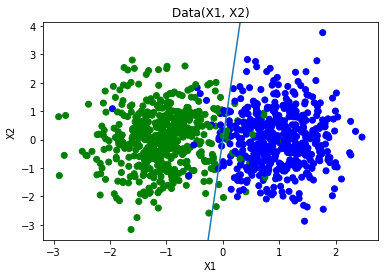

[ 0.          0.04438405 -0.0036736 ]


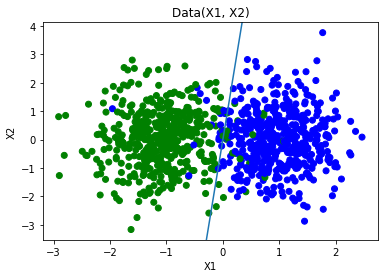

[-0.01        0.05049338  0.00696313]


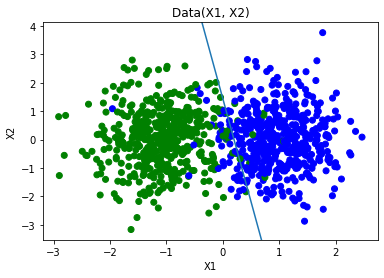

[ 0.          0.05815262 -0.00483947]


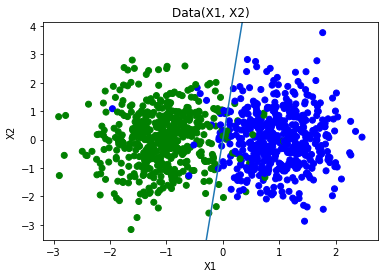

[ 0.          0.04222536 -0.00552171]


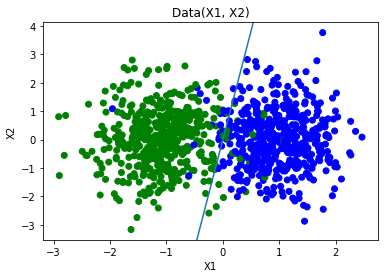

[ 0.          0.03944135 -0.00419337]


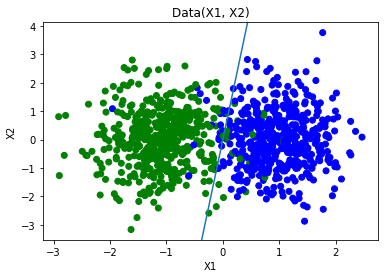

[ 0.          0.04405139 -0.00354764]


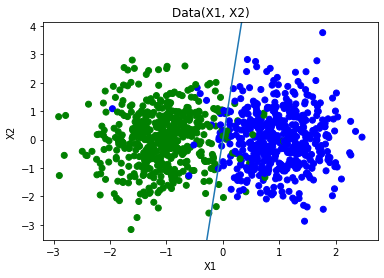

[-0.01        0.04432852 -0.0066085 ]


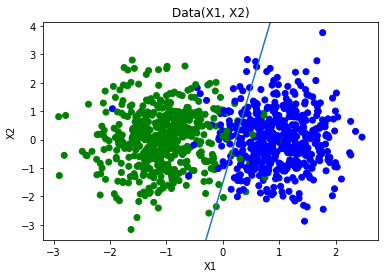

[-1.00000000e-02  4.28794686e-02  4.24422161e-05]


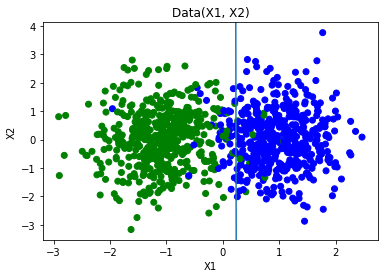

[-0.01        0.0410148  -0.01097544]


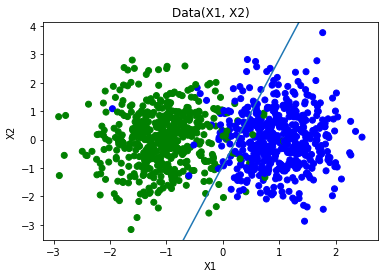

[ 0.          0.04284814 -0.00345824]


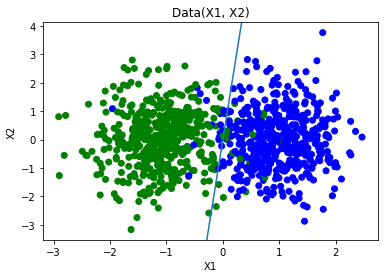

[-0.01        0.05229613  0.00229096]


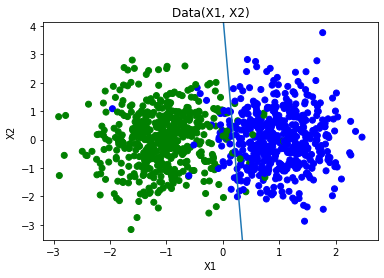

[-0.01       0.0393414  0.0003334]


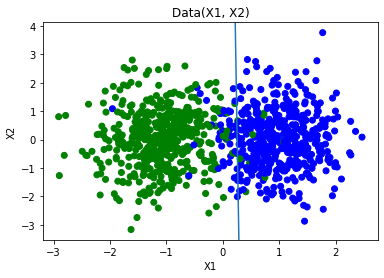

[-0.01        0.05277118  0.00230431]


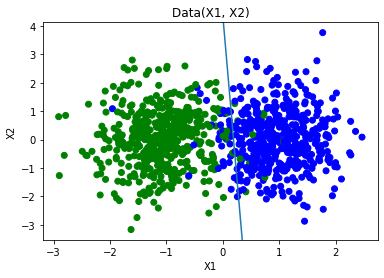

[-0.01        0.03651569 -0.01203272]


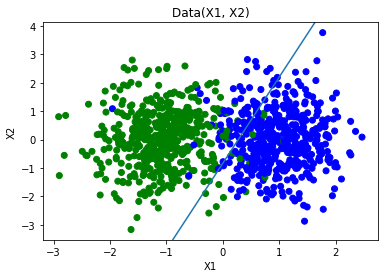

[ 0.          0.04828926 -0.00910627]


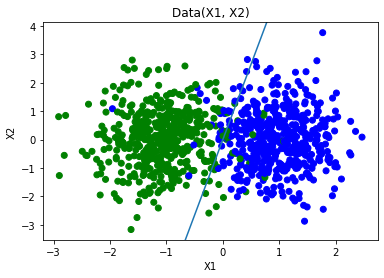

[ 0.          0.05029032 -0.00516148]


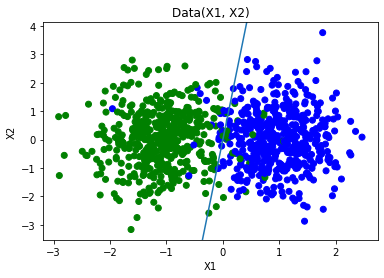

[ 0.          0.04666667 -0.0091142 ]


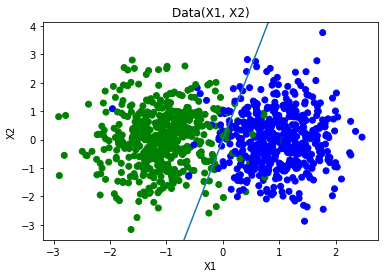

[ 0.          0.03993712 -0.00520858]


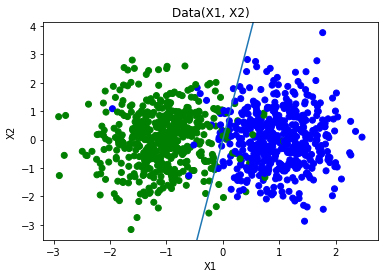

[0.         0.04588923 0.00147307]


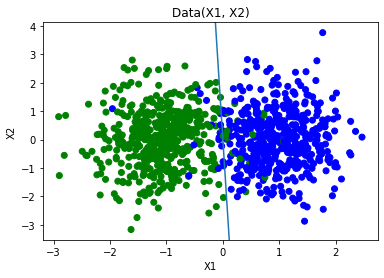

[-0.01        0.04548532  0.0008074 ]


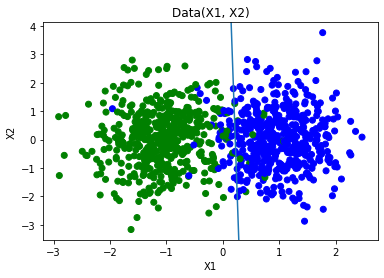

[-0.01        0.03903657 -0.01065715]


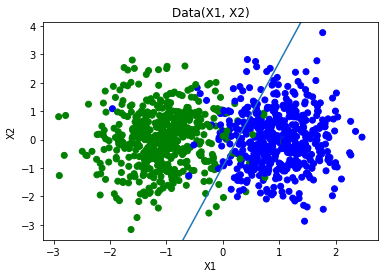

[ 0.          0.05435766 -0.00490972]


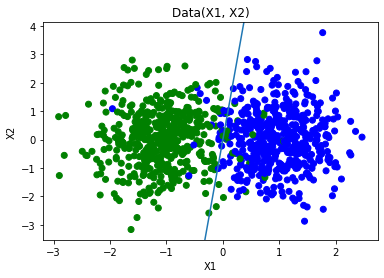

[-0.01        0.04006206 -0.0106291 ]


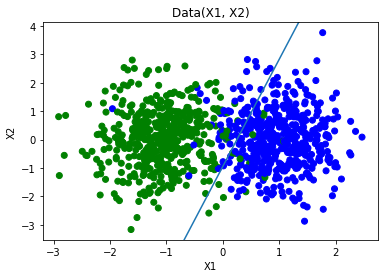

[-0.01        0.03665319 -0.01121615]


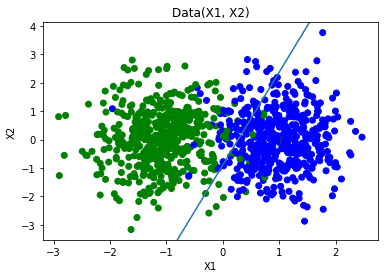

[-0.01        0.04808269  0.00146979]


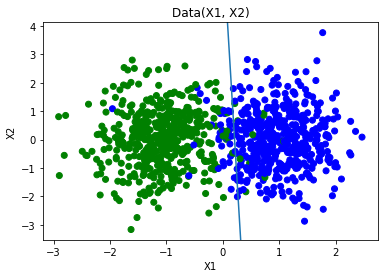

[ 0.          0.04734045 -0.00938402]


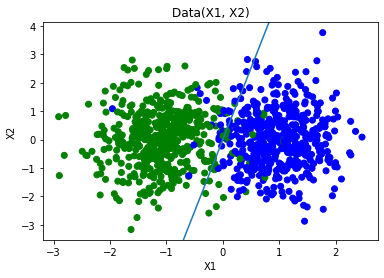

[ 0.          0.04061089 -0.00547841]


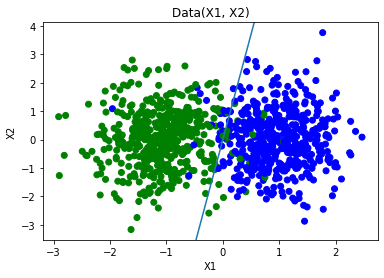

[-0.01        0.04014984 -0.01069546]


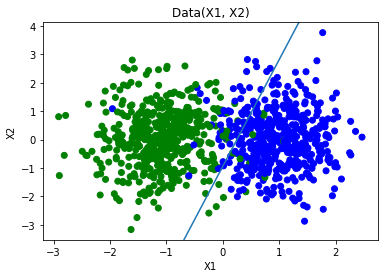

[ 0.          0.04789287 -0.00908545]


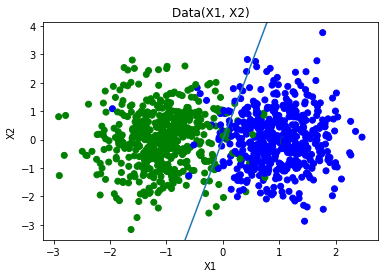

[-1.0000000e-02  3.8837681e-02 -1.6344801e-05]


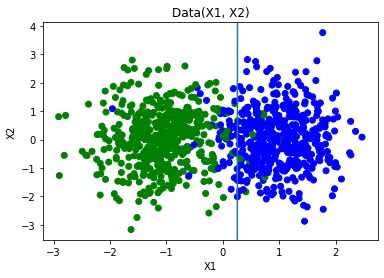

[ 0.          0.04879408 -0.00896445]


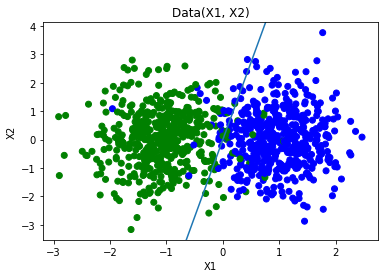

[ 0.          0.04729109 -0.00948745]


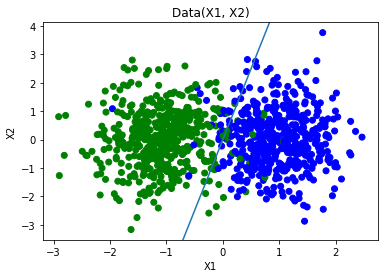

[ 0.          0.04867212 -0.00907247]


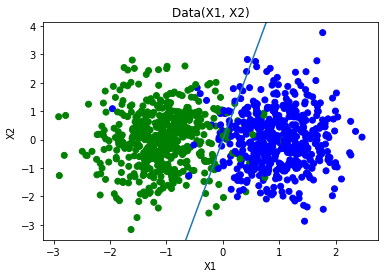

[ 0.          0.05067318 -0.00512768]


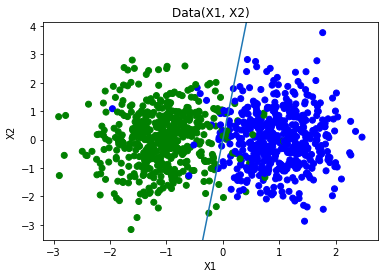

[ 0.          0.04704952 -0.0090804 ]


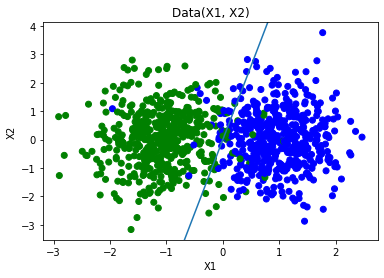

[ 0.          0.04031997 -0.00517478]


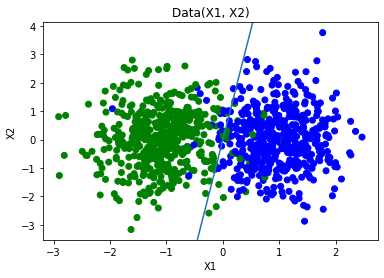

[-0.01        0.03985892 -0.01039184]


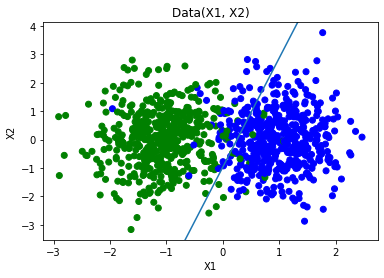

[-0.01        0.04457133  0.00083908]


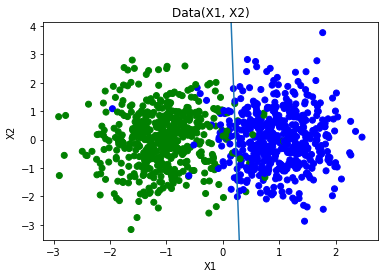

[-0.01        0.03576712 -0.00902923]


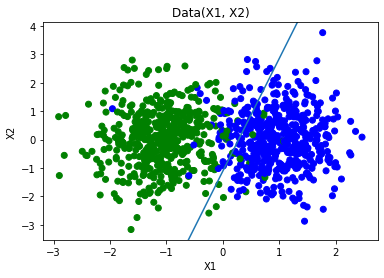

[ 0.          0.04403604 -0.00361401]


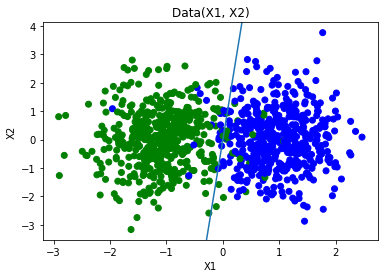

[-0.01        0.04431318 -0.00667487]


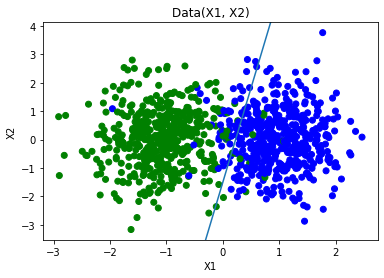

[-1.00000000e-02  4.28641228e-02 -2.39247800e-05]


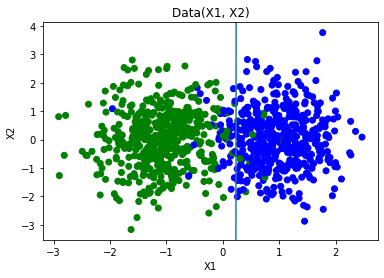

In [17]:
perceptron3 = Perceptron()
perceptron3.fit(X3, t3, 0.01, 50)

### Testing

Accuracy 98.33333333333333 %


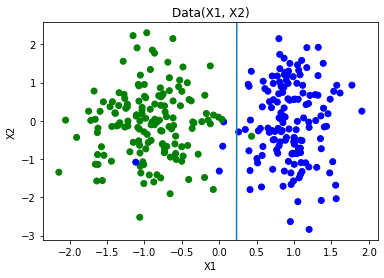

In [19]:
X3_test, y3_actual = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14, class_sep=1)
y3_predicted = perceptron3.predict(X3_test)
acc3 = perceptron3.accuracy(y3_actual, y3_predicted)
print('Accuracy', acc3, '%')
perceptron3.scatter_plot(X3_test, y3_actual)